<a href="https://colab.research.google.com/github/vikyap/Dog-breed-identification/blob/main/Dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from matplotlib.pyplot import imread

# Explore Data

In [2]:
labels_csv = pd.read_csv("drive/MyDrive/Dog breed identification/labels.csv")

labels_csv.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [3]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [4]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

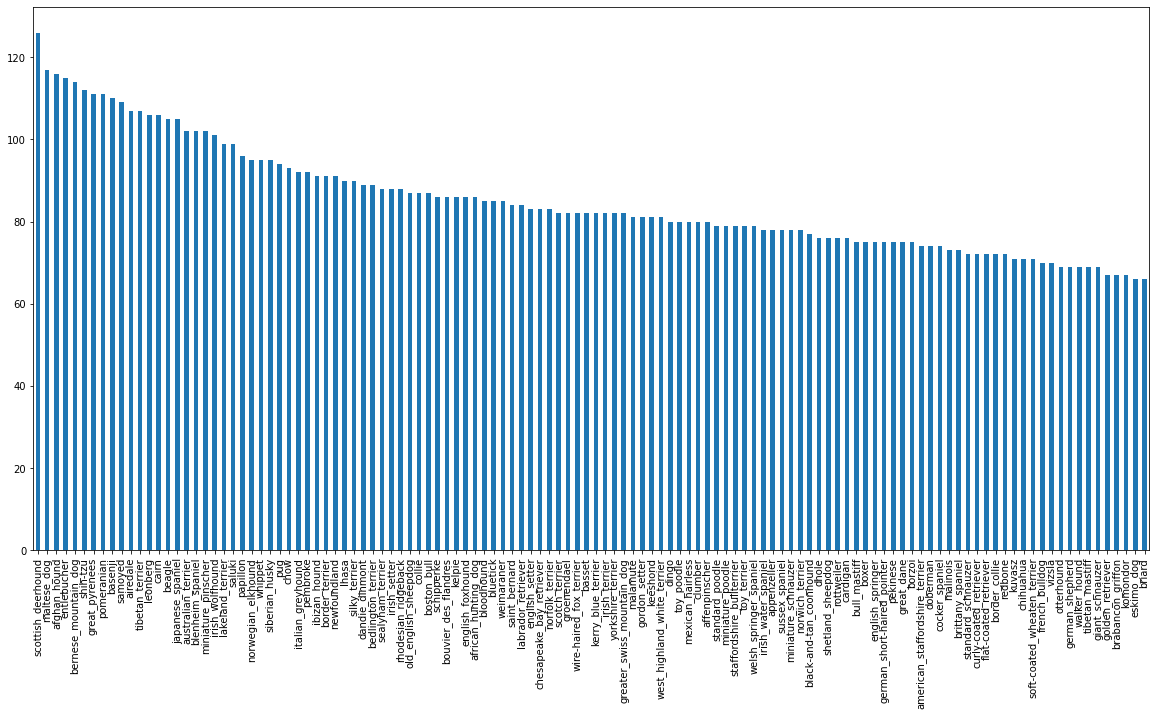

In [5]:
# value counts spread out, model won't overfit on certain labels 
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [6]:
# array of all breeds
breeds = np.unique(labels_csv["breed"].to_numpy())
breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [7]:
train_images = ["drive/MyDrive/Dog breed identification/train/" + name + ".jpg" for name in labels_csv["id"]]
train_images[:5]

['drive/MyDrive/Dog breed identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog breed identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog breed identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog breed identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog breed identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [8]:
test_images = ["drive/MyDrive/Dog breed identification/test/" + name for name in os.listdir("drive/MyDrive/Dog breed identification/test/")]
test_images[:5]

['drive/MyDrive/Dog breed identification/test/e6ec1891d8f52a13683c73cabd3045cb.jpg',
 'drive/MyDrive/Dog breed identification/test/e6e1e02b07347a522f96eba87d29a5c0.jpg',
 'drive/MyDrive/Dog breed identification/test/e745d75a74a9cbdc917e7775febd88e8.jpg',
 'drive/MyDrive/Dog breed identification/test/e7340d1efa70bf6d6c134e1e150f9473.jpg',
 'drive/MyDrive/Dog breed identification/test/e6ed62f411426a4f7e26e6ccdbaf7ecc.jpg']

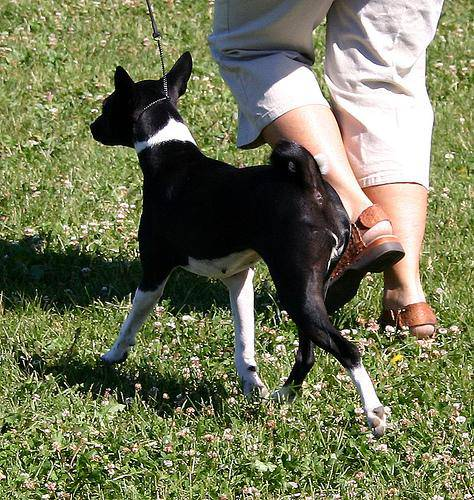

In [9]:
Image(train_images[8])

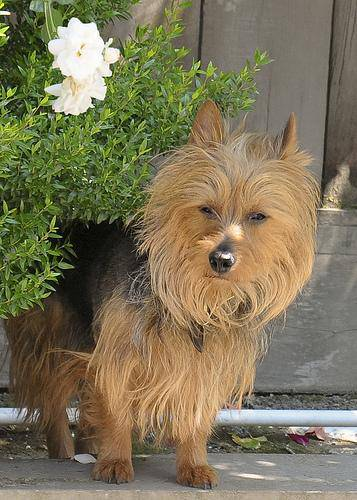

In [10]:
Image(test_images[8])

In [11]:
# convert image into numpy array
sample_image = imread(train_images[8])
print(sample_image)
print(" ")
print(sample_image.shape) # (height, width, colour channel (RGB (0-255)))

[[[137 146  79]
  [134 143  76]
  [127 136  69]
  ...
  [108 120  58]
  [ 92 106  45]
  [ 89 105  43]]

 [[127 133  69]
  [121 130  65]
  [121 130  65]
  ...
  [116 128  66]
  [ 93 107  46]
  [ 89 105  43]]

 [[140 146  82]
  [126 132  68]
  [124 130  66]
  ...
  [ 89  99  38]
  [ 96 107  47]
  [ 89 103  42]]

 ...

 [[ 50  74   0]
  [100 122  60]
  [245 255 218]
  ...
  [ 42  25   7]
  [146 134 122]
  [106  99  91]]

 [[ 55  79   1]
  [ 76  98  36]
  [106 123  79]
  ...
  [185 168 150]
  [230 218 206]
  [183 176 168]]

 [[ 84 108  30]
  [112 134  72]
  [ 42  59  15]
  ...
  [131 114  96]
  [117 105  93]
  [ 63  56  48]]]
 
(500, 474, 3)


# Preprocess images and labels

In [12]:
# transform labels into numerical form
one_hot = OneHotEncoder(sparse=False)
labels = one_hot.fit_transform(labels_csv["breed"].to_numpy().reshape(-1,1))

In [13]:
labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [14]:
# https://www.tensorflow.org/tutorials/load_data/images
def process_image(image_filename): 
  image = tf.io.read_file(image_filename)
  image = tf.image.decode_jpeg(image, channels=3) # convert image to tensor with 3 colour channels
  image = tf.image.convert_image_dtype(image, tf.float32) # normalisation
  image = tf.image.resize(image, size=[224, 224])
  return image

In [15]:
def get_image_label(image_filename, label):
  image = process_image(image_filename)
  return image, label 

# Prepare datasets for modelling

In [16]:
# split into train and validation set
X_train, X_val, y_train, y_val = train_test_split(train_images[:5000], 
                                                  labels[:5000], 
                                                  test_size=0.2, 
                                                  random_state=42)

print("Train:", len(X_train), len(y_train))
print("Validation:", len(X_val), len(y_val))

Train: 4000 4000
Validation: 1000 1000


In [17]:
# https://www.tensorflow.org/guide/data 
# create batches of size 32
train_dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X_train), tf.constant(y_train)))
train_data_batch = train_dataset.map(get_image_label).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X_val), tf.constant(y_val)))
val_data_batch = val_dataset.map(get_image_label).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((tf.constant(test_images)))
test_data_batch = test_dataset.map(process_image).batch(32)

full_train_dataset = tf.data.Dataset.from_tensor_slices((tf.constant(train_images), (tf.constant(labels))))
full_train_data_batch = full_train_dataset.map(get_image_label).batch(32)

In [18]:
# images: (batch size, height, width, colour channel)
# labels: (batch size, dimension)
print("Train:", train_data_batch.element_spec) 
print("\nValidation:", val_data_batch.element_spec)
print("\nTest:", test_data_batch.element_spec)

Train: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.float64, name=None))

Validation: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.float64, name=None))

Test: TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)


# Models 
1) MobileNetV2

2) EfficientNetV2

In [19]:
# https://tfhub.dev/
# MobileNetV2 for transfer learning 
model_mobile = tf.keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5"),
        tf.keras.layers.Dense(units=120, activation="softmax")
])

model_mobile.compile( 
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_mobile.build([None, 224, 224, 3])

In [20]:
model_mobile.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              6158505   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 6,278,745
Trainable params: 120,240
Non-trainable params: 6,158,505
_________________________________________________________________


In [21]:
# stop training once the model stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                                  patience=3)

In [22]:
model_mobile.fit(train_data_batch, 
                 epochs=100, 
                 validation_data=val_data_batch,
                 callbacks=early_stopping)

Epoch 1/100
125/125 [==============================] - 50s 219ms/step - loss: 2.2052 - accuracy: 0.5160 - val_loss: 0.8943 - val_accuracy: 0.7590
Epoch 2/100
125/125 [==============================] - 22s 179ms/step - loss: 0.4627 - accuracy: 0.8873 - val_loss: 0.7343 - val_accuracy: 0.7900
Epoch 3/100
125/125 [==============================] - 25s 200ms/step - loss: 0.2282 - accuracy: 0.9582 - val_loss: 0.6978 - val_accuracy: 0.7910
Epoch 4/100
125/125 [==============================] - 22s 179ms/step - loss: 0.1356 - accuracy: 0.9820 - val_loss: 0.6832 - val_accuracy: 0.7920
Epoch 5/100
125/125 [==============================] - 22s 177ms/step - loss: 0.0893 - accuracy: 0.9940 - val_loss: 0.6739 - val_accuracy: 0.7940
Epoch 6/100
125/125 [==============================] - 23s 187ms/step - loss: 0.0637 - accuracy: 0.9970 - val_loss: 0.6688 - val_accuracy: 0.7950
Epoch 7/100
125/125 [==============================] - 23s 181ms/step - loss: 0.0479 - accuracy: 0.9985 - val_loss: 0.6667 -

In [23]:
model_mobile.evaluate(val_data_batch)

32/32 [==============================] - 19s 610ms/step - loss: 0.7121 - accuracy: 0.8060


[0.7120915055274963, 0.8059999942779541]

In [24]:
model_efficient = tf.keras.Sequential([
                  hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification/2"), 
                  tf.keras.layers.Dense(units=120, activation="softmax")
                  ])

model_efficient.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
    )

model_efficient.build([None, 224, 224, 3])

In [25]:
model_efficient.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1000)              7200312   
                                                                 
 dense_1 (Dense)             (None, 120)               120120    
                                                                 
Total params: 7,320,432
Trainable params: 120,120
Non-trainable params: 7,200,312
_________________________________________________________________


In [26]:
model_efficient.fit(train_data_batch, 
                    epochs=100, 
                    validation_data=val_data_batch, 
                    callbacks=early_stopping)

Epoch 1/100
125/125 [==============================] - 33s 199ms/step - loss: 2.2700 - accuracy: 0.4860 - val_loss: 1.0190 - val_accuracy: 0.7320
Epoch 2/100
125/125 [==============================] - 24s 190ms/step - loss: 0.5670 - accuracy: 0.8455 - val_loss: 0.8512 - val_accuracy: 0.7590
Epoch 3/100
125/125 [==============================] - 24s 191ms/step - loss: 0.3061 - accuracy: 0.9312 - val_loss: 0.8176 - val_accuracy: 0.7720
Epoch 4/100
125/125 [==============================] - 24s 194ms/step - loss: 0.1894 - accuracy: 0.9690 - val_loss: 0.8073 - val_accuracy: 0.7740
Epoch 5/100
125/125 [==============================] - 24s 188ms/step - loss: 0.1273 - accuracy: 0.9872 - val_loss: 0.8053 - val_accuracy: 0.7720
Epoch 6/100
125/125 [==============================] - 24s 190ms/step - loss: 0.0916 - accuracy: 0.9937 - val_loss: 0.8036 - val_accuracy: 0.7740
Epoch 7/100
125/125 [==============================] - 24s 189ms/step - loss: 0.0695 - accuracy: 0.9980 - val_loss: 0.8034 -

In [27]:
model_efficient.evaluate(val_data_batch)

32/32 [==============================] - 5s 142ms/step - loss: 0.8233 - accuracy: 0.7920


[0.8232685327529907, 0.7919999957084656]

# Visualise predictions on better performing model

In [28]:
# predicted probabilities of each class label
model_mobile_pred_probs = model_mobile.predict(val_data_batch)
model_mobile_pred_probs

array([[1.8430290e-08, 1.8163947e-08, 5.6330087e-08, ..., 3.0347155e-07,
        1.1130622e-06, 3.5484530e-07],
       [1.3509737e-07, 1.9499043e-07, 1.8453174e-07, ..., 1.5692512e-08,
        2.0370582e-08, 3.7812914e-08],
       [6.2313120e-06, 2.8527472e-06, 3.2225271e-06, ..., 2.6543912e-06,
        3.2893611e-05, 2.6447175e-03],
       ...,
       [8.5442986e-07, 3.2651801e-07, 1.9452829e-04, ..., 8.5455248e-08,
        1.4202915e-07, 1.3780254e-07],
       [2.0581431e-04, 1.2252956e-05, 2.4689733e-08, ..., 1.0595691e-05,
        2.1969455e-03, 5.5776851e-05],
       [9.1383377e-08, 3.4591008e-06, 8.4754683e-09, ..., 4.4424096e-09,
        6.2329641e-10, 2.3131173e-08]], dtype=float32)

In [29]:
# predicted label of first validation image
breeds[np.argmax(model_mobile_pred_probs[0])]

'border_terrier'

In [30]:
unbatched_images = []
unbatched_labels = []

for image, label in val_data_batch.unbatch().as_numpy_iterator(): 
  unbatched_images.append(image)
  unbatched_labels.append(breeds[np.argmax(label)])

In [31]:
def image_pred(pred_probs, images, labels, index=0): 
  pred_prob, true_label, image = pred_probs[index], labels[index], images[index]
  pred_label = breeds[np.argmax(pred_prob)]
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title("True: {} Pred: {} {:2.0f}%".format(true_label, pred_label, np.max(pred_prob)*100))

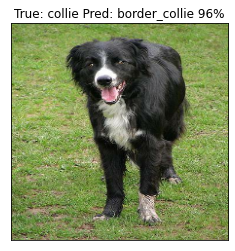

In [44]:
image_pred(model_mobile_pred_probs, unbatched_images, unbatched_labels, 12)

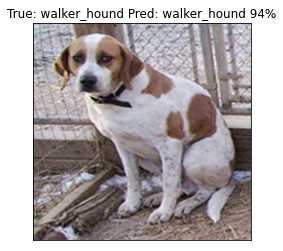

In [49]:
image_pred(model_mobile_pred_probs, unbatched_images, unbatched_labels, 687)

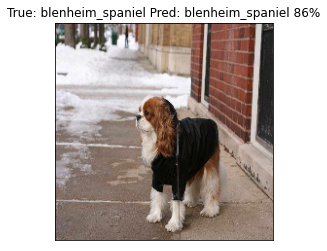

In [51]:
image_pred(model_mobile_pred_probs, unbatched_images, unbatched_labels, 748)

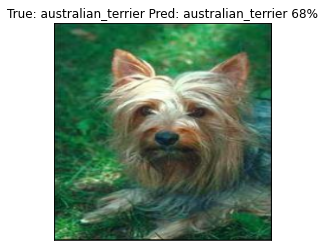

In [47]:
image_pred(model_mobile_pred_probs, unbatched_images, unbatched_labels, 2)

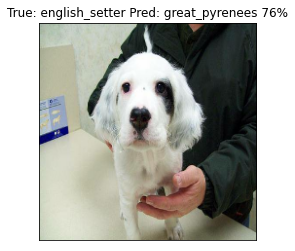

In [48]:
image_pred(model_mobile_pred_probs, unbatched_images, unbatched_labels, 142)


# Train full dataset on better performing model

In [33]:
model_mobile_full = tf.keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5"),
        tf.keras.layers.Dense(units=120, activation="softmax")
])

model_mobile_full.compile( 
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_mobile_full.build([None, 224, 224, 3])

In [34]:
early_stopping_full = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                  patience=3)

In [35]:
model_mobile_full.fit(full_train_data_batch,
                      epochs=100, 
                      callbacks=early_stopping_full)

Epoch 1/100
320/320 [==============================] - 53s 153ms/step - loss: 1.3059 - accuracy: 0.6789
Epoch 2/100
320/320 [==============================] - 48s 149ms/step - loss: 0.3586 - accuracy: 0.8928
Epoch 3/100
320/320 [==============================] - 49s 153ms/step - loss: 0.1990 - accuracy: 0.9532
Epoch 4/100
320/320 [==============================] - 51s 159ms/step - loss: 0.1248 - accuracy: 0.9775
Epoch 5/100
320/320 [==============================] - 52s 161ms/step - loss: 0.0843 - accuracy: 0.9896
Epoch 6/100
320/320 [==============================] - 52s 162ms/step - loss: 0.0605 - accuracy: 0.9941
Epoch 7/100
320/320 [==============================] - 52s 163ms/step - loss: 0.0458 - accuracy: 0.9960
Epoch 8/100
320/320 [==============================] - 52s 161ms/step - loss: 0.0361 - accuracy: 0.9973
Epoch 9/100
320/320 [==============================] - 52s 164ms/step - loss: 0.0295 - accuracy: 0.9985
Epoch 10/100
320/320 [==============================] - 54s 167m

# Predicting test dataset

In [36]:
# predicted probabilities of each class label
test_pred_probs = model_mobile_full.predict(test_data_batch)
test_pred_probs

array([[1.91493417e-08, 2.57863203e-10, 1.18059633e-08, ...,
        1.12942224e-08, 9.37215191e-06, 7.46293249e-09],
       [2.43947884e-08, 2.69333338e-08, 1.94765164e-07, ...,
        4.27452644e-04, 9.34708755e-09, 4.84374461e-08],
       [1.75216623e-08, 1.02946297e-10, 6.63846148e-12, ...,
        1.86849960e-07, 2.93617047e-10, 1.74456216e-09],
       ...,
       [2.85683619e-08, 2.04013577e-06, 4.74330136e-07, ...,
        2.21428014e-08, 9.95009542e-01, 4.05173978e-07],
       [3.55733953e-09, 7.06039600e-08, 2.10327670e-07, ...,
        1.14226295e-09, 3.83005798e-04, 5.82569446e-05],
       [1.17286986e-10, 1.31074004e-12, 3.71855116e-11, ...,
        4.64429661e-10, 8.88413995e-11, 1.15622442e-10]], dtype=float32)

In [37]:
# create dataframe with predicted probabilities of each class label for each test image
test_predictions_df = pd.DataFrame(columns=["id"] + ["predicted"] + list(breeds))
test_predictions_df.head()

,id,predicted,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [38]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir("drive/MyDrive/Dog breed identification/test/")]
test_predictions_df["id"] = test_ids
test_predictions_df.head()

,id,predicted,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e6ec1891d8f52a13683c73cabd3045cb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e6e1e02b07347a522f96eba87d29a5c0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e745d75a74a9cbdc917e7775febd88e8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e7340d1efa70bf6d6c134e1e150f9473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e6ed62f411426a4f7e26e6ccdbaf7ecc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
test_predictions_df[list(breeds)] = test_pred_probs
test_predictions_df.head()

,id,predicted,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e6ec1891d8f52a13683c73cabd3045cb,NaN,1.914934e-08,2.578632e-10,1.180596e-08,5.495077e-05,5.588295e-09,3.565153e-10,1.347321e-09,1.997473e-09,...,1.437217e-07,2.386395e-11,1.068655e-08,3.182516e-10,5.390765e-11,5.911446e-11,7.932504e-12,1.129422e-08,9.372152e-06,7.462932e-09
1,e6e1e02b07347a522f96eba87d29a5c0,NaN,2.439479e-08,2.693333e-08,1.947652e-07,7.532387e-09,2.602193e-03,6.054129e-05,1.446367e-08,6.366521e-06,...,8.462545e-07,5.643379e-06,6.534283e-06,1.049884e-06,5.656167e-03,2.626959e-10,1.547308e-09,4.274526e-04,9.347088e-09,4.843745e-08
2,e745d75a74a9cbdc917e7775febd88e8,NaN,1.752166e-08,1.029463e-10,6.638461e-12,9.873292e-09,2.555115e-07,1.177834e-09,1.382903e-09,5.977400e-08,...,3.669698e-07,1.364840e-09,3.138268e-06,4.295613e-09,3.604517e-11,5.044037e-08,5.136725e-09,1.868500e-07,2.936170e-10,1.744562e-09
3,e7340d1efa70bf6d6c134e1e150f9473,NaN,1.045355e-08,2.183551e-07,6.170257e-09,2.665263e-06,1.816310e-07,2.957901e-06,3.810390e-07,6.082163e-10,...,3.947891e-11,8.793428e-11,9.416095e-09,1.899409e-05,6.452074e-08,9.871399e-07,3.988369e-10,2.351487e-08,1.515113e-11,1.627416e-10
4,e6ed62f411426a4f7e26e6ccdbaf7ecc,NaN,3.733154e-07,9.702129e-12,2.638969e-10,4.827600e-08,9.093251e-07,7.927167e-09,1.100306e-10,4.596647e-11,...,2.707976e-08,3.187434e-09,6.739888e-09,9.015776e-11,6.164573e-10,7.289495e-11,3.156996e-08,1.888714e-07,4.386705e-10,1.234029e-07


In [40]:
# max probability = predicted class label 
test_predictions_df["predicted"] = breeds[np.argmax(test_pred_probs, axis=1)]
test_predictions_df.head()

,id,predicted,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e6ec1891d8f52a13683c73cabd3045cb,kerry_blue_terrier,1.914934e-08,2.578632e-10,1.180596e-08,5.495077e-05,5.588295e-09,3.565153e-10,1.347321e-09,1.997473e-09,...,1.437217e-07,2.386395e-11,1.068655e-08,3.182516e-10,5.390765e-11,5.911446e-11,7.932504e-12,1.129422e-08,9.372152e-06,7.462932e-09
1,e6e1e02b07347a522f96eba87d29a5c0,great_dane,2.439479e-08,2.693333e-08,1.947652e-07,7.532387e-09,2.602193e-03,6.054129e-05,1.446367e-08,6.366521e-06,...,8.462545e-07,5.643379e-06,6.534283e-06,1.049884e-06,5.656167e-03,2.626959e-10,1.547308e-09,4.274526e-04,9.347088e-09,4.843745e-08
2,e745d75a74a9cbdc917e7775febd88e8,redbone,1.752166e-08,1.029463e-10,6.638461e-12,9.873292e-09,2.555115e-07,1.177834e-09,1.382903e-09,5.977400e-08,...,3.669698e-07,1.364840e-09,3.138268e-06,4.295613e-09,3.604517e-11,5.044037e-08,5.136725e-09,1.868500e-07,2.936170e-10,1.744562e-09
3,e7340d1efa70bf6d6c134e1e150f9473,bernese_mountain_dog,1.045355e-08,2.183551e-07,6.170257e-09,2.665263e-06,1.816310e-07,2.957901e-06,3.810390e-07,6.082163e-10,...,3.947891e-11,8.793428e-11,9.416095e-09,1.899409e-05,6.452074e-08,9.871399e-07,3.988369e-10,2.351487e-08,1.515113e-11,1.627416e-10
4,e6ed62f411426a4f7e26e6ccdbaf7ecc,boxer,3.733154e-07,9.702129e-12,2.638969e-10,4.827600e-08,9.093251e-07,7.927167e-09,1.100306e-10,4.596647e-11,...,2.707976e-08,3.187434e-09,6.739888e-09,9.015776e-11,6.164573e-10,7.289495e-11,3.156996e-08,1.888714e-07,4.386705e-10,1.234029e-07
